# Exploratory Data Analysis - 'Terrorism'

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Note:
Since it contains 135 columns. They have a huge proportion in dataset and Learning them doesn't make any sense. So, we will rename the columns name for better understaning and then we will only extract necessary columns.

In [5]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [6]:
data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [7]:
data.head()  # Extract new data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## Exploratory Data Analysis

In [9]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


## Terrorist Activities by Region in each Year through Area Plot

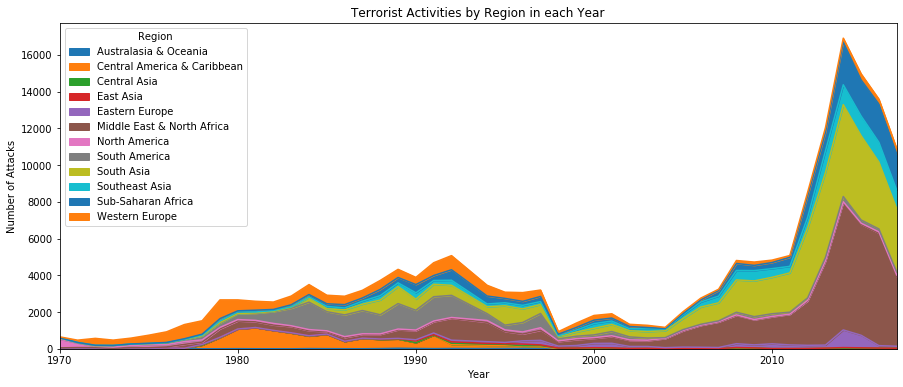

In [11]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

### Number of Terrorist Activities each Year

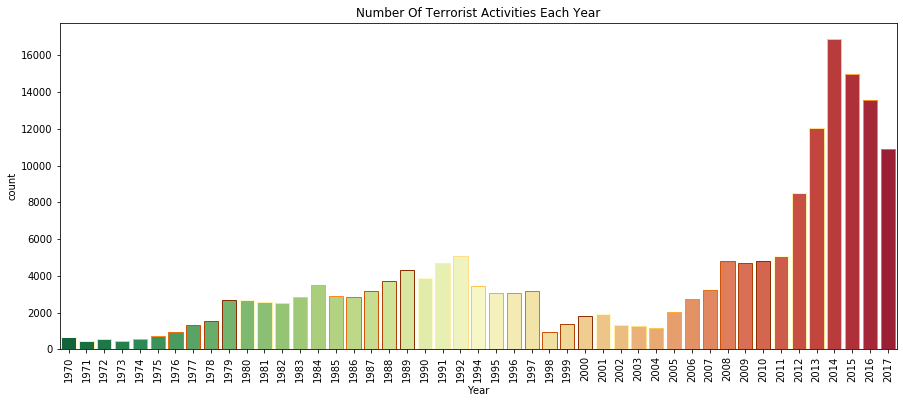

In [12]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 10))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


Since 2014 and 2015 has a large number of Terrorist activities.

#### Number of attack were there in 1970 & 2017 and  Also find percentage the attacks have increased.

In [13]:
Year=data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'attacks happened in 1970 &',Year[2017],'attacks happened in 2017')
print('So the number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 attacks happened in 1970 & 10900 attacks happened in 2017
So the number of attacks from 1970 has increased by 94.0 % till 2017


### Methods of attack

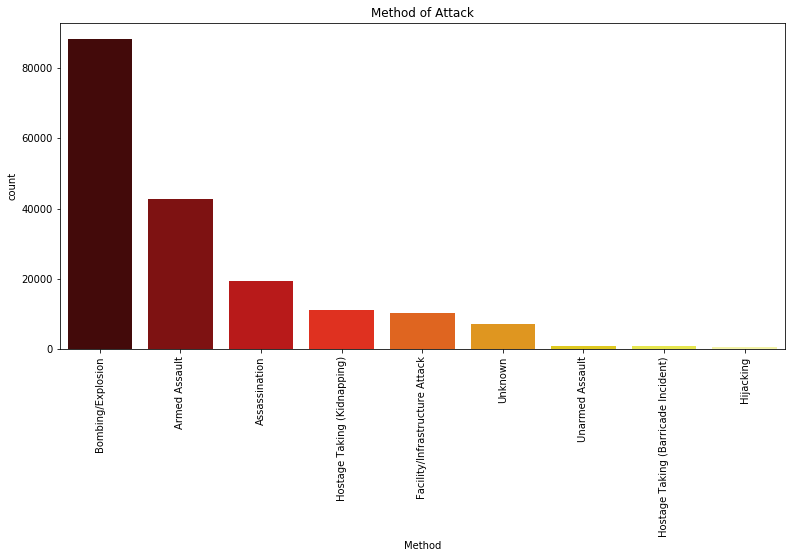

In [15]:
plt.figure(figsize=(13,6))
sns.countplot(data['AttackType'],order=data['AttackType'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Since from the above chart it is clear that Bombing/Explosion method was mostly used.

### Type of target

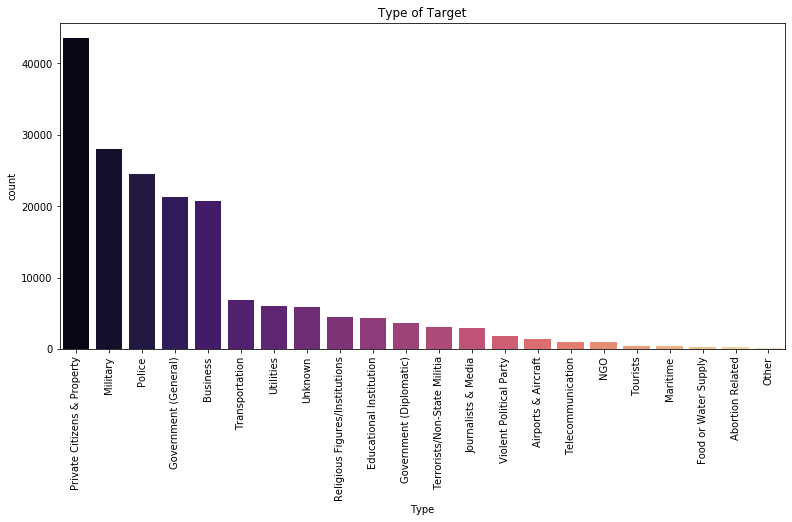

In [16]:
plt.figure(figsize=(13,6))
sns.countplot(data['Target_type'],order=data['Target_type'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

### Total number of terrorist attack in each country and regions using barplot


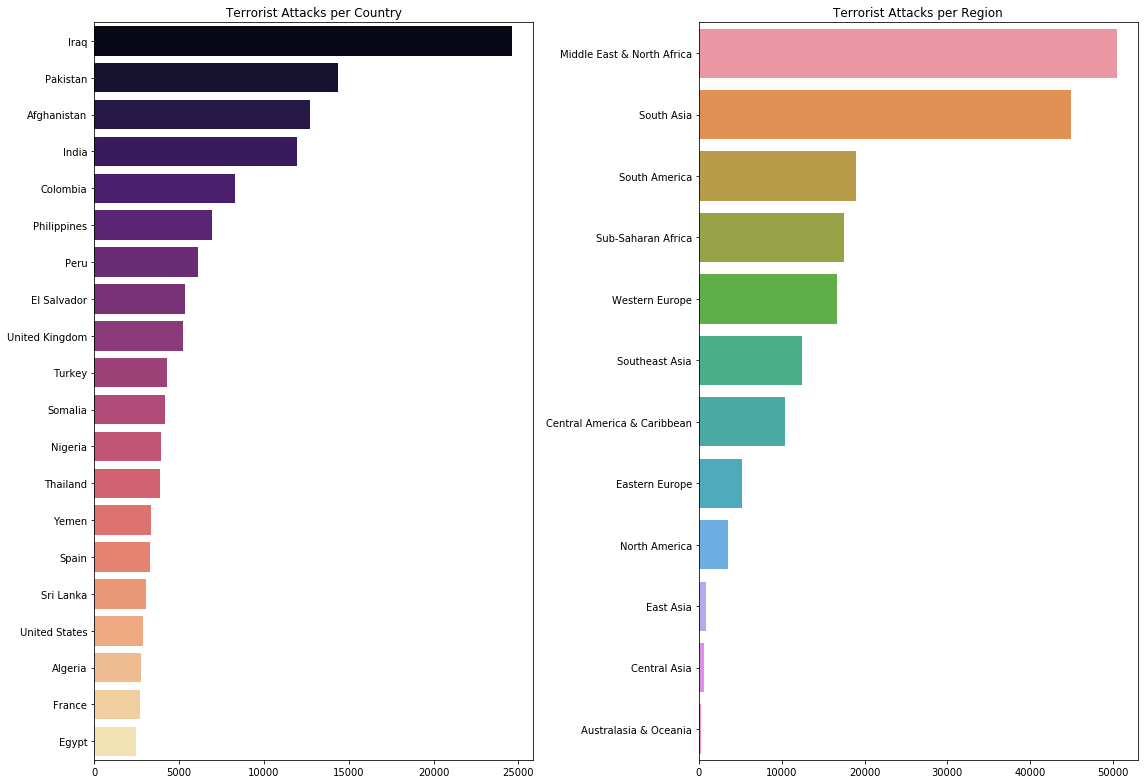

In [17]:
fig,axes = plt.subplots(figsize=(16,11),nrows=1,ncols=2)
sns.barplot(x = data['Country'].value_counts()[:20].values, y = data['Country'].value_counts()[:20].index, 
            ax=axes[0],palette = 'magma');
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=data['Region'].value_counts().values,y=data['Region'].value_counts().index,
            ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

### Country suffered the maximum attacks(state the number) and country suffered minimum attacks(state the number)

In [20]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['Country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['Country'][min_id]

In [21]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


### Now let us check out which terrorist organizations have carried out their operations in each country.

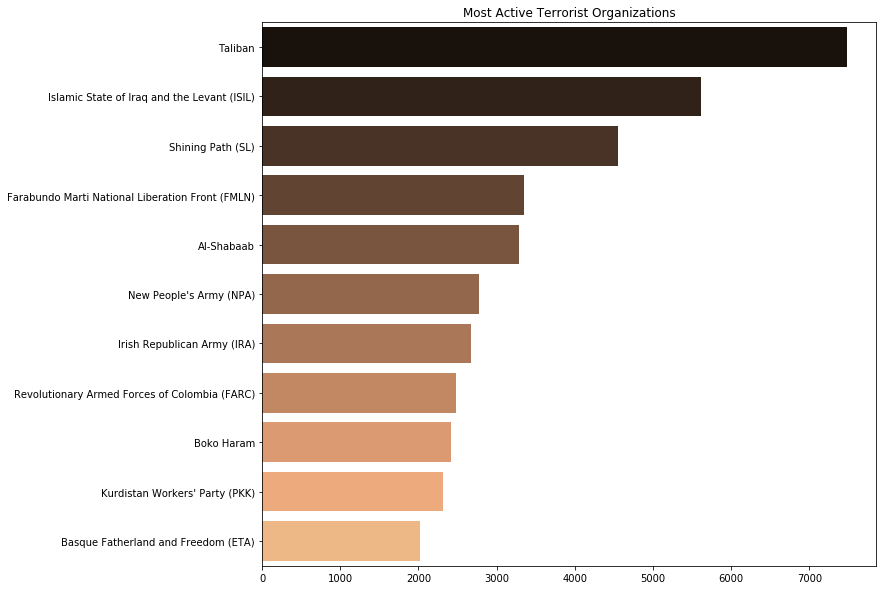

In [22]:
plt.subplots(figsize=(11,10))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,
           palette='copper')
plt.title('Most Active Terrorist Organizations')
plt.show()

### Now we will look closer at trend Before and after the War on Terror

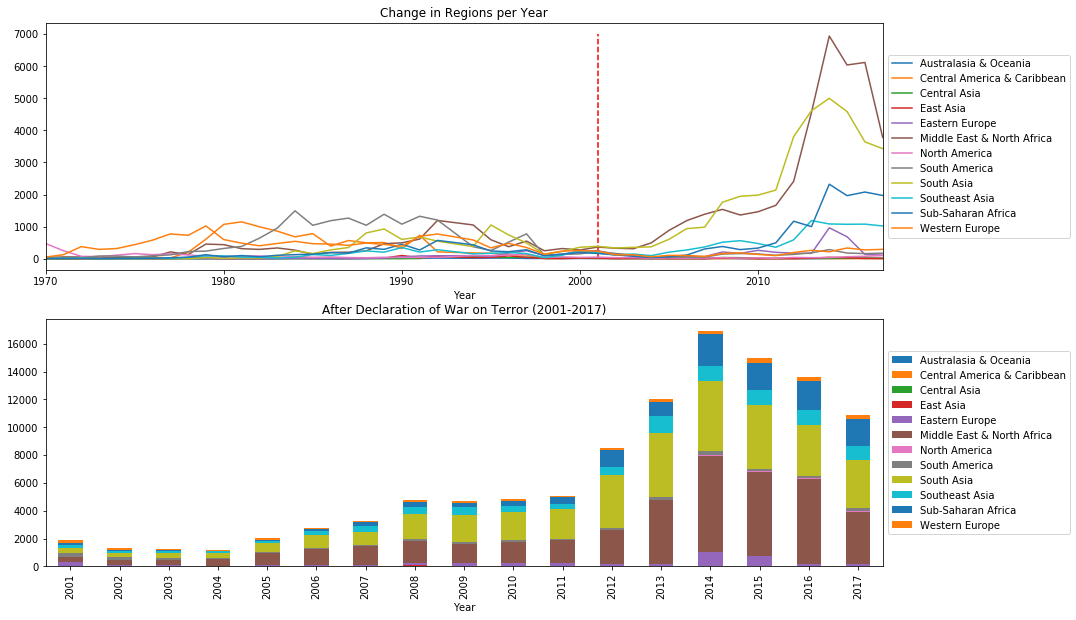

In [23]:

data_after = data[data['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0] = pd.crosstab(data.Year,data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left',bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.show()

From the first plot, it is very noticeable that the terrorism landscape before and after the War on Terror is vastly different. Before 2001, the regions were much closer together in terms of activity, eventually all dropping to a minimum in 2000. After 2001, the Middle East and South Asia have dictated the rise in terrorism numbers, with a significant increase in Sub-Saharan Africa as well